
# Forecasting Principal Commodities food export of Madhya Pradesh using ARIMA, Seasonal ARIMA and Holt-Winters method


### 1) ARIMA And SARIMA

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

'C:\\Users\\os\\Downloads\\ARIMA-And-Seasonal-ARIMA-master\\ARIMA-And-Seasonal-ARIMA-master'

In [4]:
df=pd.read_csv('foodExportMP (1).csv')

In [5]:
df.head()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
0,2014-01,57.30
1,2014-02,88.86
2,2014-03,94.00
3,2014-04,40.75
4,2014-05,51.66


In [6]:
df.tail()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
105,2022-10,131.66
106,2022-11,144.53
107,2022-12,169.98
108,NaN,NaN
109,Source: DGCIS & https://agriexchange.apeda.gov...,NaN


In [7]:
## Cleaning up the data
df.columns=["Months","Madhya Pradesh Food Export(in Rs.Crore)"]
df.head()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
0,2014-01,57.30
1,2014-02,88.86
2,2014-03,94.00
3,2014-04,40.75
4,2014-05,51.66


In [8]:
## Drop last 2 rows
df.drop(108,axis=0,inplace=True)

In [9]:
df.tail()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
104,2022-09,146.45
105,2022-10,131.66
106,2022-11,144.53
107,2022-12,169.98
109,Source: DGCIS & https://agriexchange.apeda.gov...,NaN


In [10]:
df.drop(109,axis=0,inplace=True)

In [11]:
df.tail()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
103,2022-08,144.77
104,2022-09,146.45
105,2022-10,131.66
106,2022-11,144.53
107,2022-12,169.98


In [12]:
# Convert Month into Datetime
df['Months']=pd.to_datetime(df['Months'])

In [13]:
df.head()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
0,2014-01-01,57.30
1,2014-02-01,88.86
2,2014-03-01,94.00
3,2014-04-01,40.75
4,2014-05-01,51.66


In [14]:
df.set_index('Months',inplace=True)

In [15]:
df.head()

,Madhya Pradesh Food Export(in Rs.Crore)
Months,
2014-01-01,57.30
2014-02-01,88.86
2014-03-01,94.00
2014-04-01,40.75
2014-05-01,51.66


In [16]:
df.describe()

,Madhya Pradesh Food Export(in Rs.Crore)
count,108.000000
mean,82.041019
std,33.822763
min,25.460000
25%,54.647500
50%,74.625000
75%,97.765000
max,170.520000


##  Visualize the Data

<AxesSubplot:xlabel='Months'>

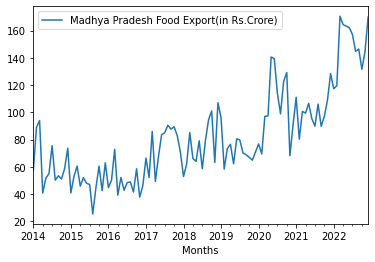

In [17]:
df.plot()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Madhya Pradesh Food Export(in Rs.Crore)'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['Madhya Pradesh Food Export(in Rs.Crore)'])

ADF Test Statistic : -0.4680047704021492
p-value : 0.8981103795505964
#Lags Used : 2
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [22]:
df['Sales First Difference'] = df['Madhya Pradesh Food Export(in Rs.Crore)'] - df['Madhya Pradesh Food Export(in Rs.Crore)'].shift(1)

In [23]:
df['Madhya Pradesh Food Export(in Rs.Crore)'].shift(1)

Months
2014-01-01       NaN
2014-02-01     57.30
2014-03-01     88.86
2014-04-01     94.00
2014-05-01     40.75
               ...  
2022-08-01    157.02
2022-09-01    144.77
2022-10-01    146.45
2022-11-01    131.66
2022-12-01    144.53
Name: Madhya Pradesh Food Export(in Rs.Crore), Length: 108, dtype: float64

In [24]:
df['Seasonal First Difference']=df['Madhya Pradesh Food Export(in Rs.Crore)']-df['Madhya Pradesh Food Export(in Rs.Crore)'].shift(12)

In [25]:
df.head(130)

,Madhya Pradesh Food Export(in Rs.Crore),Sales First Difference,Seasonal First Difference
Months,,,
2014-01-01,57.30,NaN,NaN
2014-02-01,88.86,31.56,NaN
2014-03-01,94.00,5.14,NaN
2014-04-01,40.75,-53.25,NaN
2014-05-01,51.66,10.91,NaN
...,...,...,...
2022-08-01,144.77,-12.25,38.72
2022-09-01,146.45,1.68,56.72
2022-10-01,131.66,-14.79,34.64


In [26]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.6980359998333228
p-value : 0.43212467189357034
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Months'>

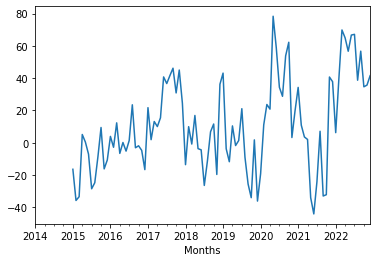

In [27]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model


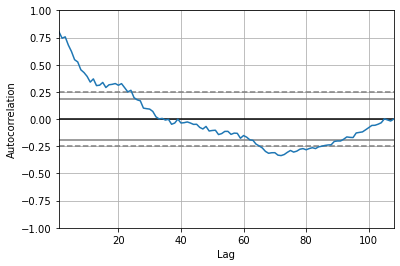

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Madhya Pradesh Food Export(in Rs.Crore)'])
plt.show()

###  Autocorrelation and Partial Autocorrelation

In [30]:
pip install --upgrade --no-deps statsmodels

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [29]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


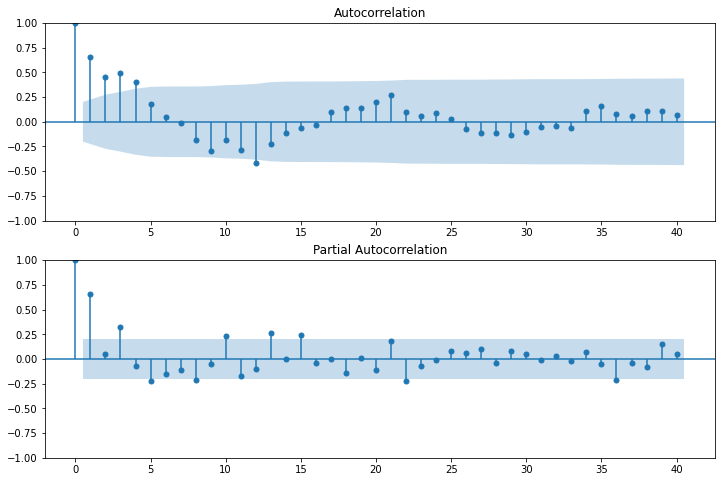

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [31]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=sm.tsa.arima.ARIMA(df['Madhya Pradesh Food Export(in Rs.Crore)'],order=(1,1,1))
model_fit=model.fit()

C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                          
===================================================================================================
Dep. Variable:     Madhya Pradesh Food Export(in Rs.Crore)   No. Observations:                  108
Model:                                      ARIMA(1, 1, 1)   Log Likelihood                -456.100
Date:                                     Wed, 10 May 2023   AIC                            918.199
Time:                                             13:54:25   BIC                            926.218
Sample:                                         01-01-2014   HQIC                           921.450
                                              - 12-01-2022                                         
Covariance Type:                                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0576      0.210      0.274      0.784      -0.354       0.469
ma.L1         -0.5747      0.157     -3.656      0.000      -0.883      -0.267
sigma2       294.1859     32.869      8.950      0.000     229.764     358.608
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.26
Prob(Q):                              0.99   Prob(JB):                         0.04
Heteroskedasticity (H):               1.83   Skew:                            -0.06
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Months'>

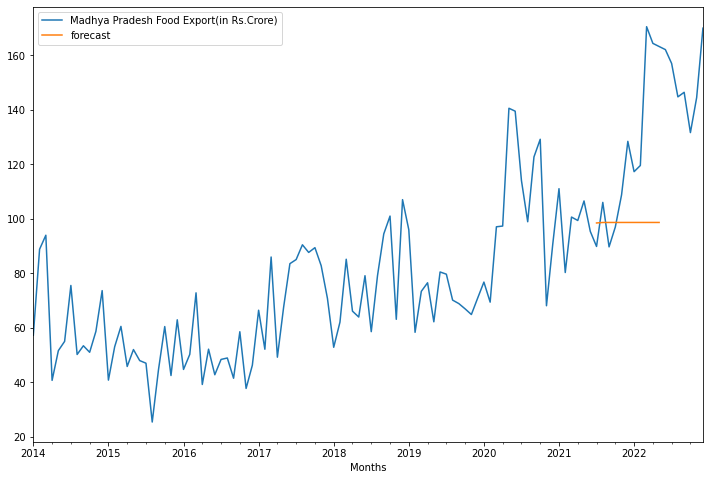

In [34]:
df['forecast']=model_fit.predict(start=90,end=100,dynamic=True)
df[['Madhya Pradesh Food Export(in Rs.Crore)','forecast']].plot(figsize=(12,8))

In [35]:
import statsmodels.api as sm

In [36]:
model=sm.tsa.statespace.SARIMAX(df['Madhya Pradesh Food Export(in Rs.Crore)'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Months'>

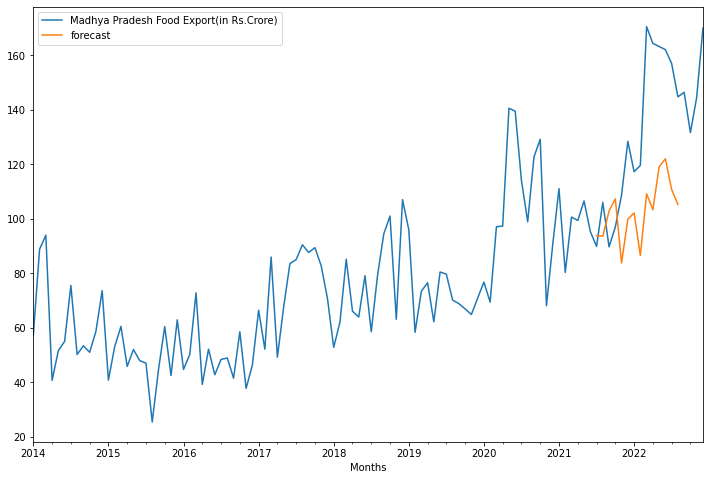

In [37]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Madhya Pradesh Food Export(in Rs.Crore)','forecast']].plot(figsize=(12,8))

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [40]:
future_datest_df.head(130)

,Madhya Pradesh Food Export(in Rs.Crore),Sales First Difference,Seasonal First Difference,forecast
2023-01-01,NaN,NaN,NaN,NaN
2023-02-01,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN


In [41]:
future_df=pd.concat([df,future_datest_df])

In [42]:
future_df.head(100)

,Madhya Pradesh Food Export(in Rs.Crore),Sales First Difference,Seasonal First Difference,forecast
2014-01-01,57.3,NaN,NaN,NaN
2014-02-01,88.86,31.56,NaN,NaN
2014-03-01,94.0,5.14,NaN,NaN
2014-04-01,40.75,-53.25,NaN,NaN
2014-05-01,51.66,10.91,NaN,NaN
...,...,...,...,...
2021-12-01,128.45,19.62,37.82,99.899241
2022-01-01,117.32,-11.13,6.24,102.165888
2022-02-01,119.59,2.27,39.27,86.579329
2022-03-01,170.52,50.93,69.85,109.210531


In [43]:
future_df.tail()

,Madhya Pradesh Food Export(in Rs.Crore),Sales First Difference,Seasonal First Difference,forecast
2024-07-01,NaN,NaN,NaN,NaN
2024-08-01,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

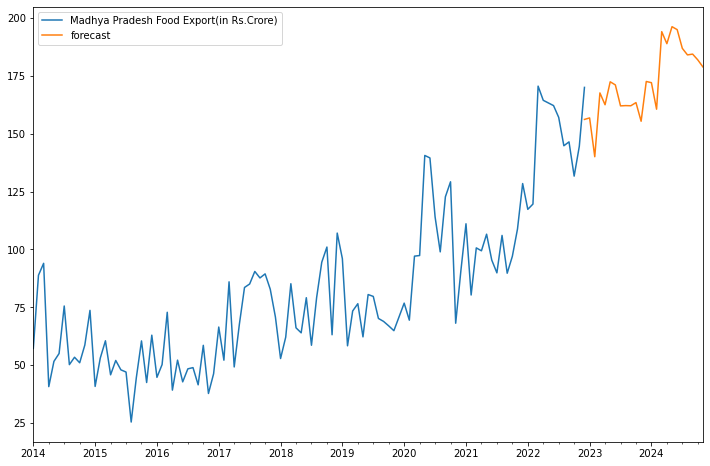

In [44]:
future_df['forecast'] = results.predict(start = 107, end = 140, dynamic= True)  
future_df[['Madhya Pradesh Food Export(in Rs.Crore)', 'forecast']].plot(figsize=(12, 8)) 

# 2) Holt-Winters method

In [57]:
!pip install --upgrade statsmodels

In [109]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [110]:
df=pd.read_csv('foodExportMP (1).csv')


In [111]:
df.head()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
0,2014-01,57.30
1,2014-02,88.86
2,2014-03,94.00
3,2014-04,40.75
4,2014-05,51.66


In [112]:
## Drop last 2 rows
df.drop([108,109],axis=0,inplace=True)

In [113]:
df.tail()

,Months,Madhya Pradesh Food Export(in Rs.Crore)
103,2022-08,144.77
104,2022-09,146.45
105,2022-10,131.66
106,2022-11,144.53
107,2022-12,169.98


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Months                                   108 non-null    object 
 1   Madhya Pradesh Food Export(in Rs.Crore)  108 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [115]:
# Convert Month into Datetime
df['Months']=pd.to_datetime(df['Months'])
df

,Months,Madhya Pradesh Food Export(in Rs.Crore)
0,2014-01-01,57.30
1,2014-02-01,88.86
2,2014-03-01,94.00
3,2014-04-01,40.75
4,2014-05-01,51.66
...,...,...
103,2022-08-01,144.77
104,2022-09-01,146.45
105,2022-10-01,131.66
106,2022-11-01,144.53


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Months                                   108 non-null    datetime64[ns]
 1   Madhya Pradesh Food Export(in Rs.Crore)  108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [117]:
#import pandas as pd

#df['timestamp'] = df['timestamp'].apply(lambda x: x.timestamp())
#df['timestamp'] = df['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
#df

In [118]:
df.set_index('Months', inplace=True)

In [119]:
df

,Madhya Pradesh Food Export(in Rs.Crore)
Months,
2014-01-01,57.30
2014-02-01,88.86
2014-03-01,94.00
2014-04-01,40.75
2014-05-01,51.66
...,...
2022-08-01,144.77
2022-09-01,146.45
2022-10-01,131.66


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Madhya Pradesh Food Export(in Rs.Crore)  108 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [121]:
df2 = df.rename(columns={'Madhya Pradesh Food Export(in Rs.Crore)': 'Price'})
df2

,Price
Months,
2014-01-01,57.30
2014-02-01,88.86
2014-03-01,94.00
2014-04-01,40.75
2014-05-01,51.66
...,...
2022-08-01,144.77
2022-09-01,146.45
2022-10-01,131.66


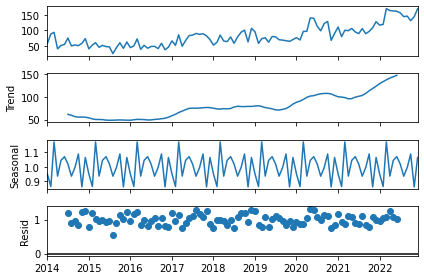

In [125]:
seasonal_decompose(df2, model='multiplicative').plot();
#result.plot()

In [126]:
train = df2[:96]
test = df2[96:]

In [127]:
train.tail()

,Price
Months,
2021-08-01,106.05
2021-09-01,89.73
2021-10-01,97.02
2021-11-01,108.83
2021-12-01,128.45


In [128]:
print(test.head())
print(test.tail())

             Price
Months            
2022-01-01  117.32
2022-02-01  119.59
2022-03-01  170.52
2022-04-01  164.40
2022-05-01  163.25
             Price
Months            
2022-08-01  144.77
2022-09-01  146.45
2022-10-01  131.66
2022-11-01  144.53
2022-12-01  169.98


### Holt winters model

### --> For train and test  

In [129]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [175]:
model = ExponentialSmoothing(train.Price,trend='add',seasonal='add', seasonal_periods=4).fit()

C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [176]:
tp = model.forecast(12)
tp

2022-01-01    112.271798
2022-02-01    114.198076
2022-03-01    114.305564
2022-04-01    111.799699
2022-05-01    114.157503
2022-06-01    116.083781
2022-07-01    116.191268
2022-08-01    113.685404
2022-09-01    116.043207
2022-10-01    117.969485
2022-11-01    118.076973
2022-12-01    115.571108
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Months'>

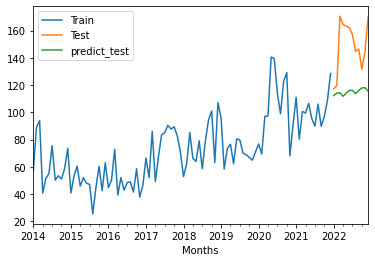

In [177]:
train['Price'].plot(legend=True,label='Train')
test['Price'].plot(legend=True,label='Test')
tp.plot(legend=True,label='predict_test')

### Model Evalution

In [159]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [160]:
np.sqrt(mean_squared_error(test,tp))

41.68937628430013

In [178]:
df2.Price.mean(),np.sqrt(df2.Price.var())

(82.04101851851853, 33.822763361127535)

### --> For whole dataset

In [172]:
model2 = ExponentialSmoothing(df2.Price,trend='add',seasonal='add', seasonal_periods=4).fit()

C:\Users\os\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [173]:
predict = model2.forecast(12)
predict

2023-01-01    156.780443
2023-02-01    157.973707
2023-03-01    160.244648
2023-04-01    158.267248
2023-05-01    160.090469
2023-06-01    161.283732
2023-07-01    163.554673
2023-08-01    161.577274
2023-09-01    163.400494
2023-10-01    164.593758
2023-11-01    166.864698
2023-12-01    164.887299
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Months'>

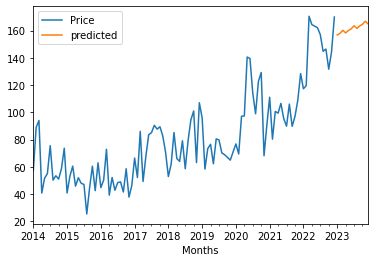

In [174]:
df2['Price'].plot(legend=True,label='Price')
predict.plot(legend=True,label='predicted')